In [12]:
import pandas as pd
import numpy as np


np.random.seed(42) 

n_samples = 1000

data = {
    'age': np.random.randint(18, 70, n_samples),
    'gender': np.random.choice(['Male', 'Female'], n_samples),
    'education': np.random.choice(['High School', 'Bachelors', 'Masters', 'PhD'], n_samples),
    'income': np.random.normal(50000, 15000, n_samples),
    'city_type': np.random.choice(['Urban', 'Suburban', 'Rural'], n_samples),
    'previous_treatment': np.random.choice([0, 1], n_samples, p=[0.7, 0.3]),
    'treatment': np.random.choice([0, 1], n_samples, p=[0.5, 0.5]),
    'outcome': np.random.normal(100, 20, n_samples)
}

df = pd.DataFrame(data)


df['outcome'] = df['outcome'] + (df['treatment'] * 10) + (df['age'] * 0.5) + (df['income'] * 0.0001)


df.to_csv('data.csv', index=False)

print("Synthetic 'data.csv' created successfully.")


df = pd.read_csv('data.csv')

print("\nDataFrame Head:")
print(df.head())

print("\nDataFrame Info:")
df.info()

print("\nDataFrame Description:")
print(df.describe())

Synthetic 'data.csv' created successfully.

DataFrame Head:
   age  gender    education        income city_type  previous_treatment  \
0   56    Male  High School  33615.308530     Urban                   1   
1   69    Male    Bachelors  45253.873255     Urban                   0   
2   46    Male          PhD  68196.465500     Urban                   0   
3   32  Female  High School  52125.753705  Suburban                   1   
4   60    Male          PhD  84789.943100  Suburban                   1   

   treatment     outcome  
0          1  156.628214  
1          0  149.251920  
2          0  156.427280  
3          0  147.633810  
4          1  155.524803  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1000 non-null   int64  
 1   gender              1000 non-null   object 
 2   educ

In [13]:
import pandas as pd


categorical_cols = df.select_dtypes(include='object').columns


df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("DataFrame after One-Hot Encoding:")
print(df_encoded.head())
print("\nDataFrame Info after Encoding:")
df_encoded.info()


T = df_encoded['treatment']
Y = df_encoded['outcome']
X = df_encoded.drop(columns=['treatment', 'outcome'])

print(f"\nShape of Treatment (T): {T.shape}")
print(f"Shape of Outcome (Y): {Y.shape}")
print(f"Shape of Covariates (X): {X.shape}")
print("\nFirst 5 rows of X:")
print(X.head())

DataFrame after One-Hot Encoding:
   age        income  previous_treatment  treatment     outcome  gender_Male  \
0   56  33615.308530                   1          1  156.628214         True   
1   69  45253.873255                   0          0  149.251920         True   
2   46  68196.465500                   0          0  156.427280         True   
3   32  52125.753705                   1          0  147.633810        False   
4   60  84789.943100                   1          1  155.524803         True   

   education_High School  education_Masters  education_PhD  \
0                   True              False          False   
1                  False              False          False   
2                  False              False           True   
3                   True              False          False   
4                  False              False           True   

   city_type_Suburban  city_type_Urban  
0               False             True  
1               False         

In [14]:
import lightgbm as lgb

!pip install econml

from econml.dml import LinearDML


model_t = lgb.LGBMClassifier(random_state=42)


model_y = lgb.LGBMRegressor(random_state=42)


dml_estimator = LinearDML(model_y=model_y, model_t=model_t, discrete_treatment=True, cv=5, random_state=42)


dml_estimator.fit(Y, T, X=X)

print("DML estimator fitted successfully.")

[LightGBM] [Info] Number of positive: 388, number of negative: 412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485000 -> initscore=-0.060018
[LightGBM] [Info] Start training from score -0.060018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\Dr.Rajan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\Dr.Rajan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dr.Rajan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dr.Rajan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python3

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000101 secon

C:\Users\Dr.Rajan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\Dr.Rajan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dr.Rajan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dr.Rajan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python3


--- CATE and ATE Estimation ---

CATE estimates shape: (1000, 1)
CATE 95% Confidence Interval (average): [1.22, 16.57]

Average Treatment Effect (ATE): 8.90
ATE 95% Confidence Interval: [-0.92, 15.78]
ATE is not statistically significant (confidence interval crosses zero).


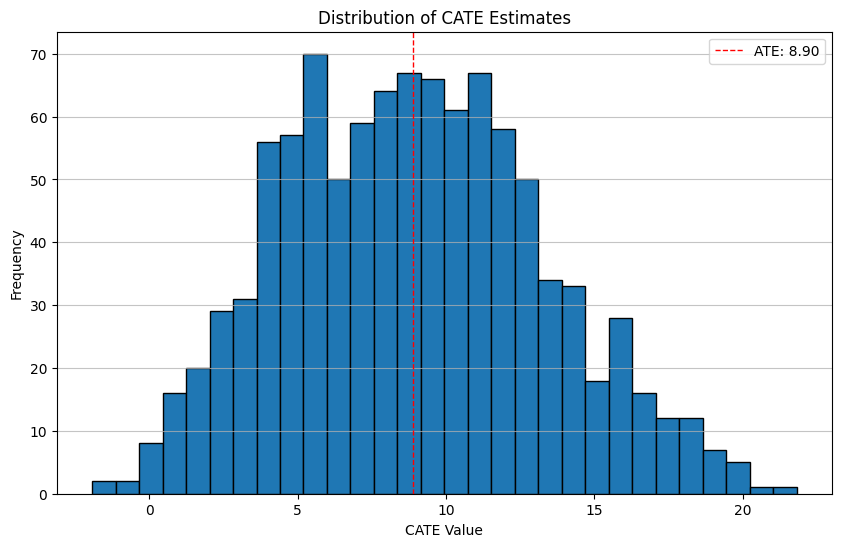


Coefficients of Covariates (CATE Feature Importance):
education_Masters        4.585531
previous_treatment       0.761640
income                  -0.000130
age                     -0.069414
education_High School   -1.772224
gender_Male             -2.205660
city_type_Suburban      -2.644938
city_type_Urban         -2.798470
education_PhD           -4.385340
dtype: float64


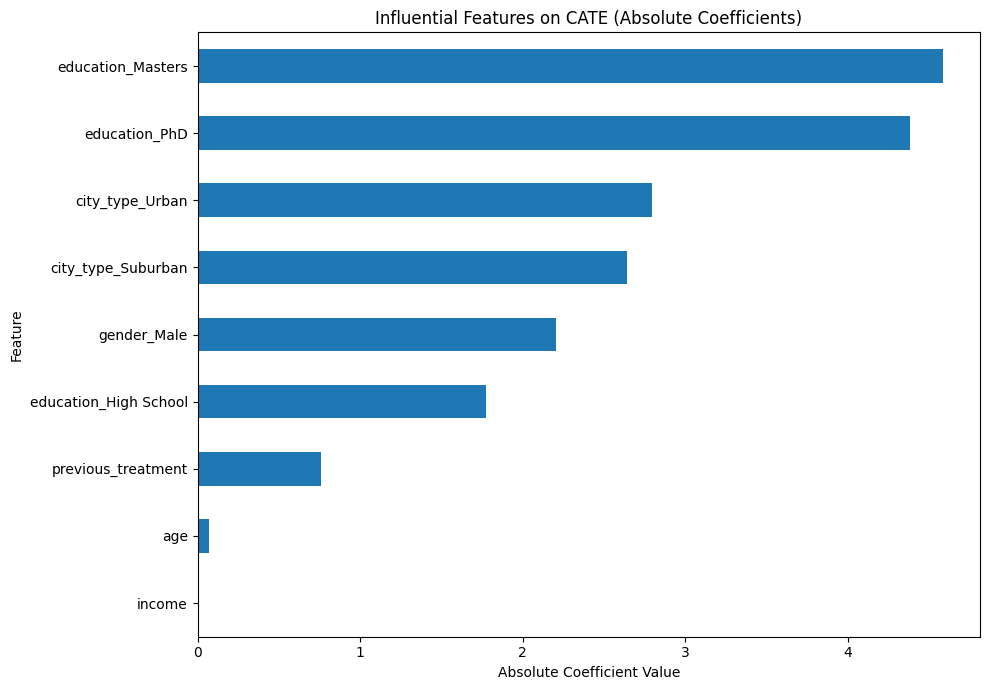

In [15]:
import numpy as np
import matplotlib.pyplot as plt

print("\n--- CATE and ATE Estimation ---")


cate_estimates = dml_estimator.const_marginal_effect(X)
print(f"\nCATE estimates shape: {cate_estimates.shape}")


cate_intervals = dml_estimator.const_marginal_effect_interval(X)
lower_bound = cate_intervals[0]
upper_bound = cate_intervals[1]
print(f"CATE 95% Confidence Interval (average): [{np.mean(lower_bound):.2f}, {np.mean(upper_bound):.2f}]")

ate_estimate = np.mean(cate_estimates)
ate_lower, ate_upper = dml_estimator.effect_interval(X)

print(f"\nAverage Treatment Effect (ATE): {ate_estimate:.2f}")
print(f"ATE 95% Confidence Interval: [{ate_lower[0]:.2f}, {ate_upper[0]:.2f}]")


if ate_lower[0] > 0 or ate_upper[0] < 0:
    print("ATE is statistically significant (confidence interval does not cross zero).")
else:
    print("ATE is not statistically significant (confidence interval crosses zero).")


plt.figure(figsize=(10, 6))
plt.hist(cate_estimates, bins=30, edgecolor='black')
plt.title('Distribution of CATE Estimates')
plt.xlabel('CATE Value')
plt.ylabel('Frequency')
plt.axvline(ate_estimate, color='red', linestyle='dashed', linewidth=1, label=f'ATE: {ate_estimate:.2f}')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()



if hasattr(dml_estimator, 'feature_importances_'):
    feature_importances = dml_estimator.feature_importances_[:len(X.columns)] 
    sorted_idx = feature_importances.argsort()
    plt.figure(figsize=(10, 7))
    plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
    plt.xlabel("Feature Importance (Absolute Coefficient Value)")
    plt.title("Influential Features on CATE (Absolute Coefficients)")
    plt.tight_layout()
    plt.show()
else:
    
    
    if hasattr(dml_estimator, 'coef_') and dml_estimator.coef_ is not None:
        
        if len(dml_estimator.coef_) == len(X.columns):
            feature_coeffs = pd.Series(dml_estimator.coef_, index=X.columns)
            print("\nCoefficients of Covariates (CATE Feature Importance):")
            print(feature_coeffs.sort_values(ascending=False))

            plt.figure(figsize=(10, 7))
            feature_coeffs.abs().sort_values().plot(kind='barh')
            plt.title('Influential Features on CATE (Absolute Coefficients)')
            plt.xlabel('Absolute Coefficient Value')
            plt.ylabel('Feature')
            plt.tight_layout()
            plt.show()
        else:
            print("Cannot directly plot feature importances: number of coefficients does not match number of features in X.")
    else:
        print("Feature importances could not be extracted directly from dml_estimator.")

In [16]:
import statsmodels.api as sm

print("\n--- OLS Regression for Treatment Effect Comparison ---")


X_ols = pd.concat([T, X], axis=1)


for col in X_ols.select_dtypes(include='bool').columns:
    X_ols[col] = X_ols[col].astype(int)


X_ols = sm.add_constant(X_ols)


ols_model = sm.OLS(Y, X_ols)
ols_results = ols_model.fit()


ols_treatment_effect = ols_results.params['treatment']

print(ols_results.summary())

print(f"\nOLS estimated treatment effect: {ols_treatment_effect:.2f}")
print(f"DML estimated Average Treatment Effect (ATE): {ate_estimate:.2f}")
print(f"DML ATE 95% Confidence Interval: [{ate_lower[0]:.2f}, {ate_upper[0]:.2f}]")


--- OLS Regression for Treatment Effect Comparison ---
                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     23.38
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           9.46e-40
Time:                        12:22:16   Log-Likelihood:                -4384.0
No. Observations:                1000   AIC:                             8790.
Df Residuals:                     989   BIC:                             8844.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [17]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, roc_auc_score

print("Necessary libraries imported.")

Necessary libraries imported.


In [18]:
print("\n--- Analyzing Nuisance Model Performance ---")


model_t_eval = lgb.LGBMClassifier(random_state=42)
model_y_eval = lgb.LGBMRegressor(random_state=42)


print("\nEvaluating model_t (LGBMClassifier) performance:")

cv_splitter_t = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
t_acc_scores = cross_val_score(model_t_eval, X, T, cv=cv_splitter_t, scoring='accuracy')
t_auc_scores = cross_val_score(model_t_eval, X, T, cv=cv_splitter_t, scoring='roc_auc')

print(f"Average Accuracy for P(T|X): {np.mean(t_acc_scores):.4f} (Std: {np.std(t_acc_scores):.4f})")
print(f"Average ROC AUC for P(T|X): {np.mean(t_auc_scores):.4f} (Std: {np.std(t_auc_scores):.4f})")


print("\nEvaluating model_y (LGBMRegressor) performance:")
X_for_y = pd.concat([T, X], axis=1) 
cv_splitter_y = KFold(n_splits=5, shuffle=True, random_state=42)
y_r2_scores = cross_val_score(model_y_eval, X_for_y, Y, cv=cv_splitter_y, scoring='r2')
y_mse_scores = cross_val_score(model_y_eval, X_for_y, Y, cv=cv_splitter_y, scoring='neg_mean_squared_error')

print(f"Average R-squared for E[Y|T,X]: {np.mean(y_r2_scores):.4f} (Std: {np.std(y_r2_scores):.4f})")
print(f"Average MSE for E[Y|T,X]: {-np.mean(y_mse_scores):.4f} (Std: {np.std(y_mse_scores):.4f})")


print("\nInterpretation of LightGBM warnings and model performance:")
if np.mean(t_auc_scores) < 0.6 or np.mean(y_r2_scores) < 0.2: 
    print("The LightGBM 'No further splits' warnings, coupled with relatively low performance metrics,")
    print("suggest that the nuisance models might be underfitting the data.")
    print("This could be due to the simplicity of the synthetic data or default LightGBM hyperparameters not being optimal for finding subtle patterns.")
    print("Consider hyperparameter tuning or using more complex models if the data warrants it.")
else:
    print("Despite the 'No further splits' warnings, the nuisance models show reasonable predictive performance.")
    print("The warnings might indicate that the default LightGBM parameters (e.g., `num_leaves`, `max_depth`) are too restrictive for the given data's complexity,")
    print("or that the data itself doesn't contain very deep, tree-like structures for the models to exploit.")
    print("However, the overall performance metrics suggest that the models are still capturing some signal.")
    print("Hyperparameter tuning could still potentially improve performance further.")


--- Analyzing Nuisance Model Performance ---

Evaluating model_t (LGBMClassifier) performance:
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 388, number of negative: 412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485000 -> initscore=-0.060018
[LightGBM] [Info] Start training from score -0.060018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [19]:
from sklearn.model_selection import GridSearchCV

print("GridSearchCV imported.")

GridSearchCV imported.


In [20]:
print("\n--- Hyperparameter Tuning for Nuisance Models ---")


param_grid_t = {
    'num_leaves': [10, 20],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [50, 100]
}


grid_search_t = GridSearchCV(estimator=model_t_eval, param_grid=param_grid_t,
                             scoring='roc_auc', cv=cv_splitter_t, verbose=0, n_jobs=-1)
grid_search_t.fit(X, T)

best_model_t = grid_search_t.best_estimator_
print(f"\nBest parameters for model_t (P(T|X)): {grid_search_t.best_params_}")
print(f"Best ROC AUC score for model_t (P(T|X)): {grid_search_t.best_score_:.4f}")


param_grid_y = {
    'num_leaves': [10, 20],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [50, 100]
}


grid_search_y = GridSearchCV(estimator=model_y_eval, param_grid=param_grid_y,
                             scoring='r2', cv=cv_splitter_y, verbose=0, n_jobs=-1)
grid_search_y.fit(X_for_y, Y)

best_model_y = grid_search_y.best_estimator_
print(f"\nBest parameters for model_y (E[Y|T,X]): {grid_search_y.best_params_}")
print(f"Best R-squared score for model_y (E[Y|T,X]): {grid_search_y.best_score_:.4f}")


dml_estimator_tuned = LinearDML(model_y=best_model_y, model_t=best_model_t,
                                discrete_treatment=True, cv=5, random_state=42)
dml_estimator_tuned.fit(Y, T, X=X)

print("\nDML estimator re-fitted successfully with tuned nuisance models.")


--- Hyperparameter Tuning for Nuisance Models ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 485, number of negative: 515
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485000 -> initscore=-0.060018
[LightGBM] [Info] Start training from score -0.060018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

C:\Users\Dr.Rajan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\Dr.Rajan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dr.Rajan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dr.Rajan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python3


--- CATE and ATE Estimation (with Tuned Models) ---

CATE estimates shape: (1000, 1)
CATE 95% Confidence Interval (average): [1.44, 17.00]

Average Treatment Effect (ATE): 9.22
ATE 95% Confidence Interval: [-1.63, 15.46]
ATE is not statistically significant (confidence interval crosses zero).


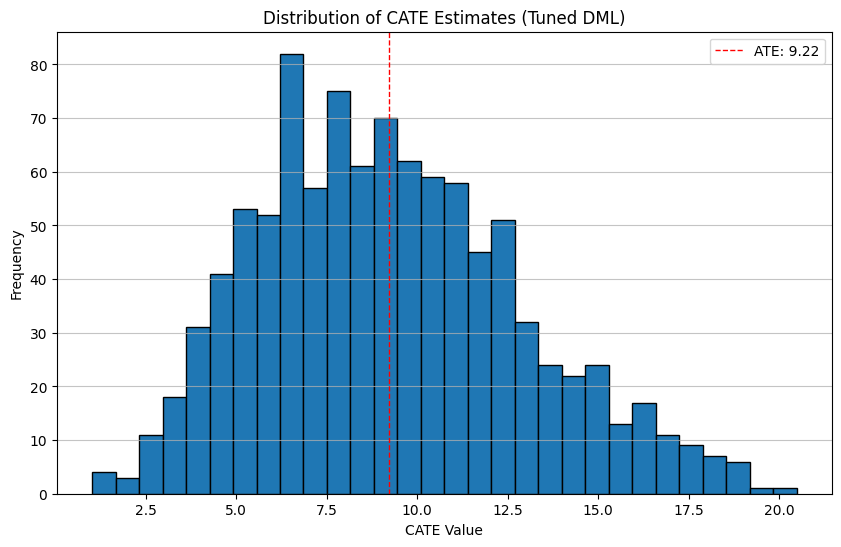


Coefficients of Covariates (CATE Feature Importance - Tuned DML):
education_Masters        5.514078
education_High School    0.366201
income                  -0.000098
age                     -0.042426
previous_treatment      -0.104381
education_PhD           -1.179978
city_type_Suburban      -2.098852
gender_Male             -2.788993
city_type_Urban         -2.961545
dtype: float64


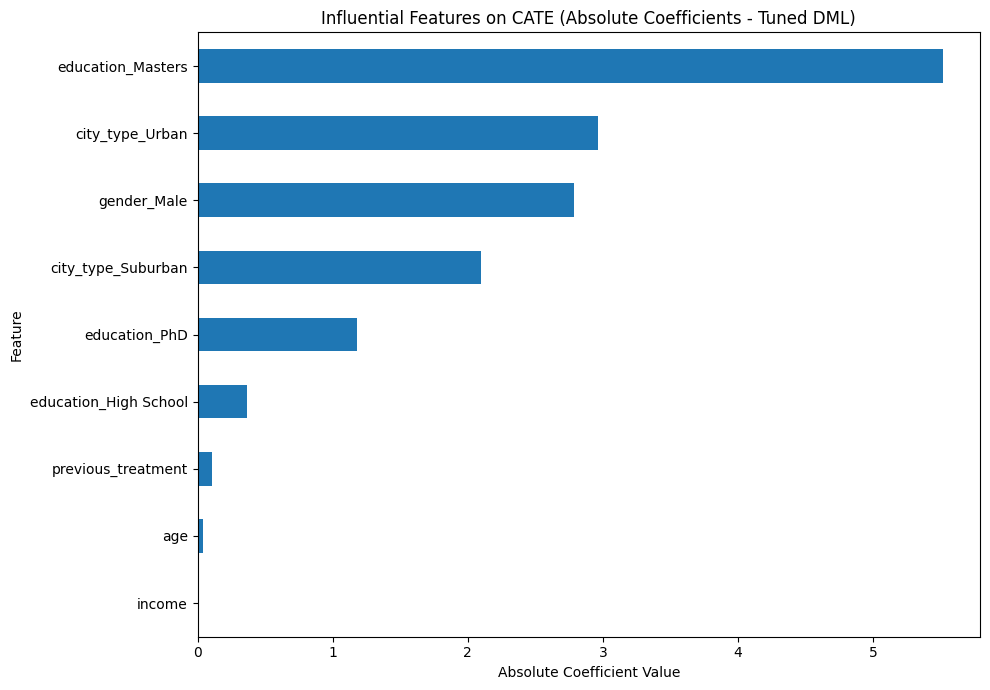

In [21]:
import numpy as np
import matplotlib.pyplot as plt

print("\n--- CATE and ATE Estimation (with Tuned Models) ---")


cate_estimates = dml_estimator_tuned.const_marginal_effect(X)
print(f"\nCATE estimates shape: {cate_estimates.shape}")


cate_intervals = dml_estimator_tuned.const_marginal_effect_interval(X)
lower_bound = cate_intervals[0]
upper_bound = cate_intervals[1]
print(f"CATE 95% Confidence Interval (average): [{np.mean(lower_bound):.2f}, {np.mean(upper_bound):.2f}]")


ate_estimate = np.mean(cate_estimates)
ate_lower, ate_upper = dml_estimator_tuned.effect_interval(X)

print(f"\nAverage Treatment Effect (ATE): {ate_estimate:.2f}")
print(f"ATE 95% Confidence Interval: [{ate_lower[0]:.2f}, {ate_upper[0]:.2f}]")


if ate_lower[0] > 0 or ate_upper[0] < 0:
    print("ATE is statistically significant (confidence interval does not cross zero).")
else:
    print("ATE is not statistically significant (confidence interval crosses zero).")


plt.figure(figsize=(10, 6))
plt.hist(cate_estimates, bins=30, edgecolor='black')
plt.title('Distribution of CATE Estimates (Tuned DML)')
plt.xlabel('CATE Value')
plt.ylabel('Frequency')
plt.axvline(ate_estimate, color='red', linestyle='dashed', linewidth=1, label=f'ATE: {ate_estimate:.2f}')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()



if hasattr(dml_estimator_tuned, 'coef_') and dml_estimator_tuned.coef_ is not None:
    
    if len(dml_estimator_tuned.coef_) == len(X.columns):
        feature_coeffs = pd.Series(dml_estimator_tuned.coef_, index=X.columns)
        print("\nCoefficients of Covariates (CATE Feature Importance - Tuned DML):")
        print(feature_coeffs.sort_values(ascending=False))

        plt.figure(figsize=(10, 7))
        feature_coeffs.abs().sort_values().plot(kind='barh')
        plt.title('Influential Features on CATE (Absolute Coefficients - Tuned DML)')
        plt.xlabel('Absolute Coefficient Value')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()
    else:
        print("Cannot directly plot feature importances: number of coefficients does not match number of features in X.")
else:
    print("Feature importances could not be extracted directly from dml_estimator_tuned.")

In [22]:
import numpy as np
from econml.dml import LinearDML

print("\n--- Conducting Placebo Test with Random Outcome ---")



np.random.seed(42) 
Y_random = pd.Series(np.random.normal(loc=Y.mean(), scale=Y.std(), size=len(Y)), index=Y.index)

print(f"Generated Y_random with mean: {Y_random.mean():.2f}, std: {Y_random.std():.2f}")



dml_estimator_placebo = LinearDML(model_y=best_model_y, model_t=best_model_t,
                                  discrete_treatment=True, cv=5, random_state=42)


dml_estimator_placebo.fit(Y_random, T, X=X)

print("Placebo DML estimator fitted successfully.")


ate_estimate_placebo = dml_estimator_placebo.const_marginal_effect(X).mean()
ate_lower_placebo, ate_upper_placebo = dml_estimator_placebo.effect_interval(X)


print(f"\nPlacebo ATE Estimate: {ate_estimate_placebo:.2f}")
print(f"Placebo ATE 95% Confidence Interval: [{ate_lower_placebo[0]:.2f}, {ate_upper_placebo[0]:.2f}]")


if ate_lower_placebo[0] > 0 or ate_upper_placebo[0] < 0:
    print("The placebo ATE is statistically significant (confidence interval does not cross zero). This is unexpected for a random outcome.")
else:
    print("The placebo ATE is NOT statistically significant (confidence interval crosses zero), which is the expected robust result for a random outcome.")



--- Conducting Placebo Test with Random Outcome ---
Generated Y_random with mean: 131.81, std: 21.13
[LightGBM] [Info] Number of positive: 388, number of negative: 412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.485000 -> initscore=-0.060018
[LightGBM] [Info] Start training from score -0.060018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

C:\Users\Dr.Rajan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\econml\utilities.py:644: UserWarning: Not all column names are strings. Coercing to strings for now.
  warnings.warn("Not all column names are strings. Coercing to strings for now.", UserWarning)
C:\Users\Dr.Rajan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\Dr.Rajan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dr.Rajan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_q